In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import powerbox as pbox

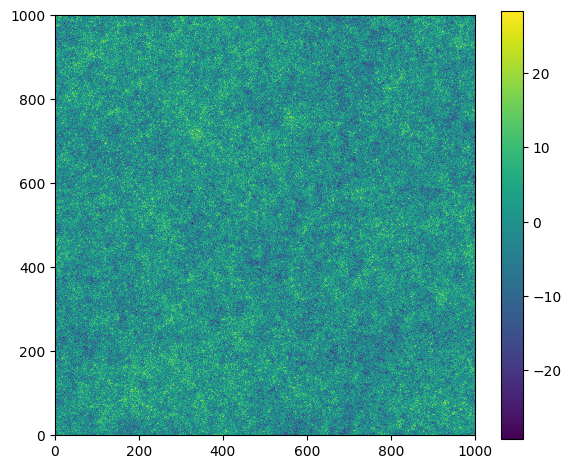

In [2]:
pb = pbox.PowerBox(
    N=1000,                     # Number of grid-points in the box
    dim=2,                     # 2D box
    pk = lambda k: k**(-7./5.), # The power-spectrum
    boxlength = 1,           # Size of the box (sets the units of k in pk)
    seed = 0                # Set a seed to ensure the box looks the same every time (optional)
)


# pb = pbox.PowerBox(1000, lambda k : k**(-7/5), boxlength=100)

fig, ax = plt.subplots(1,1,figsize=(6,6),tight_layout=True)

mesh = ax.pcolormesh(pb.delta_x())
ax.set_aspect(1)
fig.colorbar(mesh,shrink=.75)
plt.show()

/home/yangelaxue/clusters/lib/python3.12/site-packages/powerbox/tools.py:261: FutureWarning: In the future, bins will be generated by default up to the smallest length over any dimension, instead of the largest magnitude for the box.Set bins_upto_boxlen to silence this warning.
  bins = _getbins(bins, coord_mags, log_bins, bins_upto_boxlen=bins_upto_boxlen)


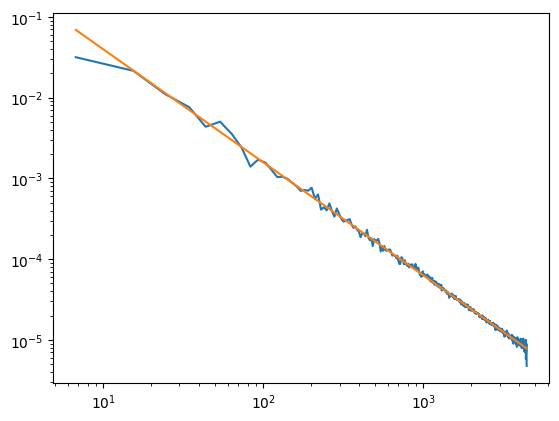

In [3]:
p_k_field, bins_field = pbox.get_power(pb.delta_x(), pb.boxlength)

plt.plot(bins_field, p_k_field)
plt.plot(bins_field, bins_field**(-7./5.))

plt.xscale('log')
plt.yscale('log')

In [7]:
gamma = 5/3 # ratio of specific heats
cs = 1 # constant sound speed, c_s^2 = gamma*p_g/rho = 1

In [2]:
def density_profile_king(r,rho_c=1.,r_c=.8,beta=2/3):
    return rho_c/(1+(r/r_c)**2)**(3*beta/2)

In [5]:
r = np.linspace(0,8,1000)

rho = density_profile_king(r)

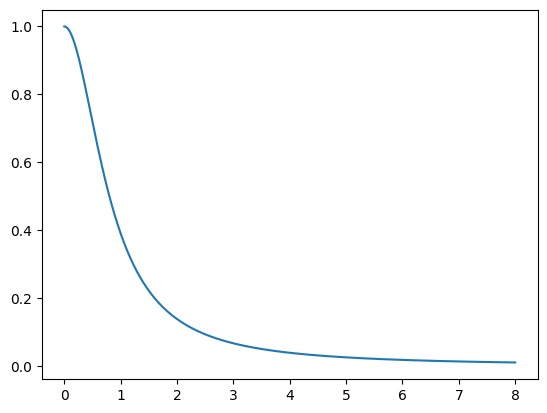

In [6]:
plt.plot(r,rho)

In [14]:
help(pbox.PowerBox)

Help on class PowerBox in module powerbox.powerbox:

class PowerBox(builtins.object)
 |  PowerBox(N, pk, dim=2, boxlength=1.0, ensure_physical=False, a=1.0, b=1.0, vol_normalised_power=True, seed=None, nthreads=None)
 |
 |  Generate real- and fourier-space Gaussian fields with a given power spectrum.
 |
 |  Parameters
 |  ----------
 |  N : int
 |      Number of grid-points on a side for the resulting box (equivalently, number of
 |      wavenumbers to use).
 |  pk : callable
 |      A callable of a single (vector) variable `k`, which is the isotropic power
 |      spectrum. The relationship of the `k` of which this is a function to the
 |      real-space co-ordinates, `x`, is determined by the parameters ``a,b``.
 |  dim : int, default 2
 |      Number of dimensions of resulting box.
 |  boxlength : float, default 1.0
 |      Length of the final signal on a side. This may have arbitrary units, so long
 |      as `pk` is a function of a variable which has the inverse units.
 |  ensure_

In [47]:
pb.delta_k().real

array([[-2.48846801e-05,  3.14654550e-04,  2.02057802e-04, ...,
         3.35472768e-05, -5.16164941e-04, -3.67042585e-04],
       [-2.42134698e-06, -1.76606103e-04,  3.72442453e-04, ...,
        -1.48583294e-04,  1.58928574e-05,  2.26635136e-04],
       [-2.05875984e-04,  1.83361666e-04,  4.97049981e-05, ...,
         6.40938201e-05, -8.01685870e-05, -1.38315756e-05],
       ...,
       [-2.01918708e-04, -4.94662735e-05,  4.20971650e-04, ...,
         1.62859829e-04,  2.22283402e-04, -1.58843747e-05],
       [-3.30081047e-04, -1.38315756e-05, -8.01685870e-05, ...,
         3.32943934e-05,  4.97049981e-05,  1.83361666e-04],
       [ 1.15340103e-05,  2.26635136e-04,  1.58928574e-05, ...,
         5.93550193e-05,  3.72442453e-04, -1.76606103e-04]],
      shape=(512, 512))

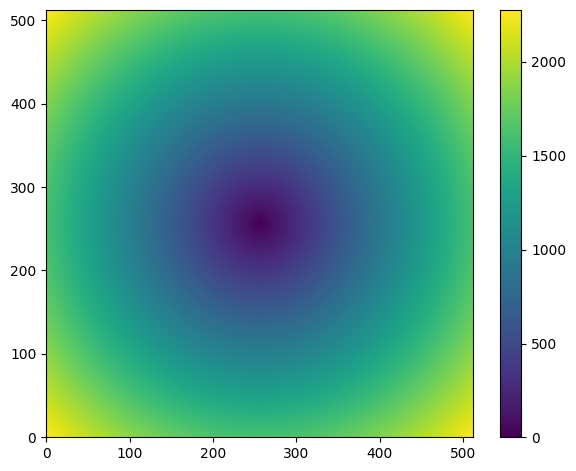

In [48]:
fig, ax = plt.subplots(1,1,figsize=(6,6),tight_layout=True)

mesh = ax.pcolormesh(pb.k())
ax.set_aspect(1)
fig.colorbar(mesh,shrink=.75)
plt.show()

In [39]:
help(pb)

Help on PowerBox in module powerbox.powerbox object:

class PowerBox(builtins.object)
 |  PowerBox(N, pk, dim=2, boxlength=1.0, ensure_physical=False, a=1.0, b=1.0, vol_normalised_power=True, seed=None, nthreads=None)
 |
 |  Generate real- and fourier-space Gaussian fields with a given power spectrum.
 |
 |  Parameters
 |  ----------
 |  N : int
 |      Number of grid-points on a side for the resulting box (equivalently, number of
 |      wavenumbers to use).
 |  pk : callable
 |      A callable of a single (vector) variable `k`, which is the isotropic power
 |      spectrum. The relationship of the `k` of which this is a function to the
 |      real-space co-ordinates, `x`, is determined by the parameters ``a,b``.
 |  dim : int, default 2
 |      Number of dimensions of resulting box.
 |  boxlength : float, default 1.0
 |      Length of the final signal on a side. This may have arbitrary units, so long
 |      as `pk` is a function of a variable which has the inverse units.
 |  ensure

In [50]:
pb.__weakref__